# First exercise

We will analyze a simple function to find its zeros, asymptotes, maximum, minimum and inflection point and we calculate its integral.

In [1]:
pkg load symbolic

## Defining the function

$$f(x)=\frac{3x^2+6x-1}{x^2+x-3}$$

In [2]:
syms x real
num = 3*x^2+6*x-1;
denom = x^2+x-3;
f = num/denom

OctSymPy v2.6.0: this is free software without warranty, see source.
Initializing communication with SymPy using a popen2() pipe.
Some output from the Python subprocess (pid 1414) might appear next.
Python 2.7.14 (default, Nov  3 2017, 10:55:25) 
[GCC 7.2.1 20170915 (Red Hat 7.2.1-2)] on linux2
Type "help", "copyright", "credits" or "license" for more information.
>>> >>> 
OctSymPy: Communication established.  SymPy v1.1.1.
f = (sym)

     2          
  3⋅x  + 6⋅x - 1
  ──────────────
     2          
    x  + x - 3  



## Plot the function

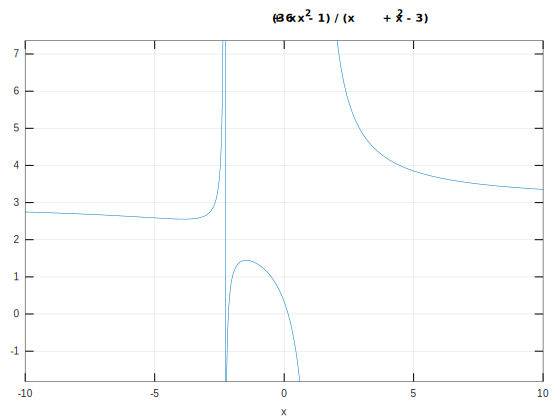

In [3]:
%plot --format svg
ezplot(f, [-10, 10]);
grid on

## Zeros

In [4]:
zero_pts = solve(f, x)

zero_pts = (sym 2×1 matrix)

  ⎡     2⋅√3 ⎤
  ⎢-1 + ──── ⎥
  ⎢      3   ⎥
  ⎢          ⎥
  ⎢  2⋅√3    ⎥
  ⎢- ──── - 1⎥
  ⎣   3      ⎦



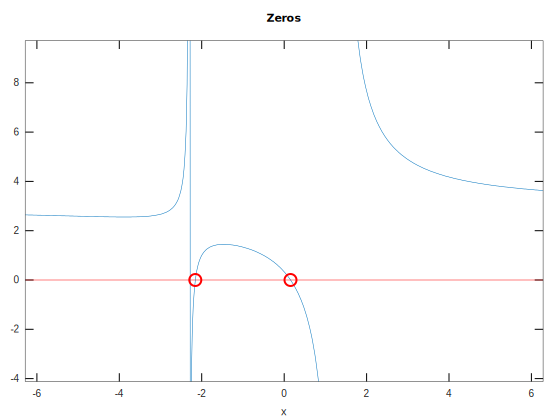

In [5]:
ezplot(f);
hold on;
line([-2*pi, 2*pi], [0, 0], 'color', 'red');
plot(double(zero_pts), double(subs(f, zero_pts)), 'ro');
title('Zeros')

## Finding the asymptotes

### Horizontal asymptotes

In [6]:
hneg = limit(f, -inf)
hpos = limit(f, inf)

hneg = (sym) 3
hpos = (sym) 3


### Vertical asymptotes

In [7]:
roots = solve(denom);
v1 = double(roots(1))
v2 = double(roots(2))

v1 =  1.3028
v2 = -2.3028


### Plot the asymptotes

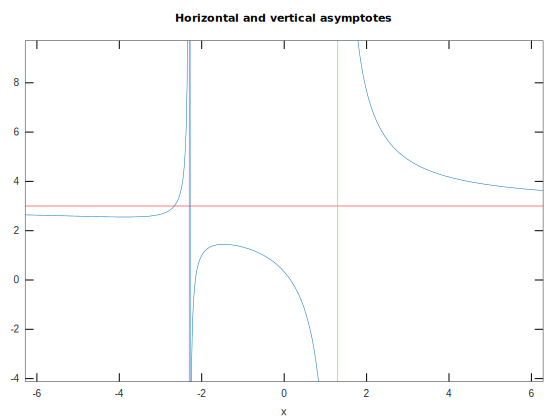

In [8]:
ezplot(f);
hold on
line([-10, 10], [3, 3], 'color', 'red') % double horizontal asymtote
line([v1, v1], [-5, 10], 'color', 'green') % first vertical asymptote
line([v2, v2], [-5, 10], 'color', 'magenta') % second vertical asymptote
title('Horizontal and vertical asymptotes')

## Finding the maximum and the minimum

From the graph we can see that f has a local maximum somewhere between the points $x=2$ and $x=3$, and a local minimum between $x=-4$ and $x=-2$

In [9]:
f1 = simplify(diff(f, x))
crit_pts = solve(f1)

f1 = (sym)

      ⎛   2            ⎞    
     -⎝3⋅x  + 16⋅x + 17⎠    
  ──────────────────────────
   4      3      2          
  x  + 2⋅x  - 5⋅x  - 6⋅x + 9

crit_pts = (sym 2×1 matrix)

  ⎡  8   √13⎤
  ⎢- ─ - ───⎥
  ⎢  3    3 ⎥
  ⎢         ⎥
  ⎢  8   √13⎥
  ⎢- ─ + ───⎥
  ⎣  3    3 ⎦



ans =

   2.5547
   1.4453



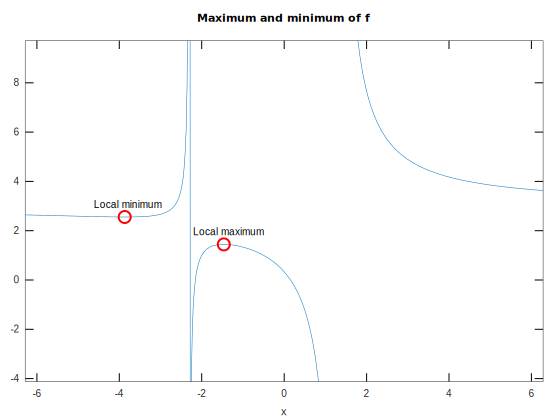

In [13]:
ezplot(f);
hold on;
plot(double(crit_pts), double(subs(f, crit_pts)), 'ro');
title('Maximum and minimum of f');
text(double(crit_pts(1))-0.75, double(subs(f, crit_pts(1)))+0.5, 'Local minimum');
text(double(crit_pts(2))-0.75, double(subs(f, crit_pts(2)))+0.5, 'Local maximum');

## Finding the inflection point

In [10]:
f2 = simplify(diff(f1, x))
inflec_pts = vpasolve(f2, x, -4)

f2 = (sym)

            ⎛   3       2            ⎞        
          2⋅⎝3⋅x  + 24⋅x  + 51⋅x + 41⎠        
  ────────────────────────────────────────────
   6      5      4       3       2            
  x  + 3⋅x  - 6⋅x  - 17⋅x  + 18⋅x  + 27⋅x - 27

inflec_pts = (sym) -5.2635217342053210183437823783747


Only the first is real.

inflec_pt = (sym) -5.2635217342053210183437823783747


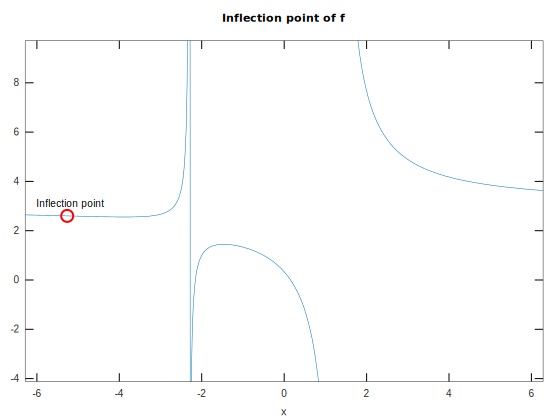

In [11]:
inflec_pt = inflec_pts(1)
ezplot(f);
hold on;
plot(double(inflec_pt), double(subs(f, inflec_pt)), 'ro')
title('Inflection point of f')
text
text(double(inflec_pt)-0.75, double(subs(f, inflec_pt))+0.5, 'Inflection point');

## Calculating the integral

In [12]:
int(f, x)

ans = (sym)

        ⎛  √13   3⎞    ⎛    1   √13⎞   ⎛3   √13⎞    ⎛    √13   1⎞
  3⋅x + ⎜- ─── + ─⎟⋅log⎜x + ─ + ───⎟ + ⎜─ + ───⎟⋅log⎜x - ─── + ─⎟
        ⎝   2    2⎠    ⎝    2    2 ⎠   ⎝2    2 ⎠    ⎝     2    2⎠



In [13]:
double(zero_pts)
double(int(f, x, zero_pts))

ans =

   0.15470
  -2.15470

ans = -2.4365e+00 - 4.2352e-22i


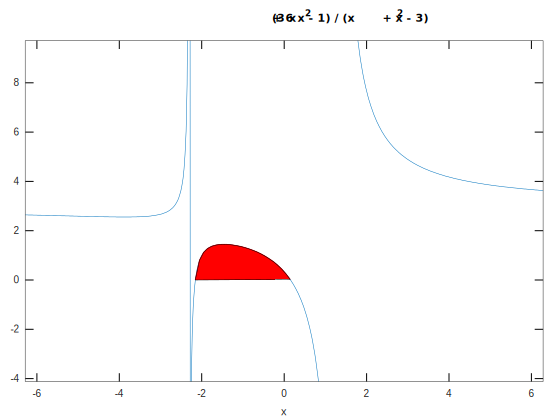

In [21]:
ezplot(f);
hold on;
ff = matlabFunction(f);
z1 = min(double(zero_pts));
z2 = max(double(zero_pts));
fill([z1:0.1:z2], ff([z1:0.1:z2]), 'r');